In [4]:
from google.colab import files
files.download('/content/cleaned_customer_churn_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **LIBRARIES IMPORT**

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA LOAD**

In [7]:
df = pd.read_csv('/content/cleaned_customer_churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Clean**

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# **VISUALIZATIONS**

**Churn** **Distribution**

/tmp/ipython-input-942806912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


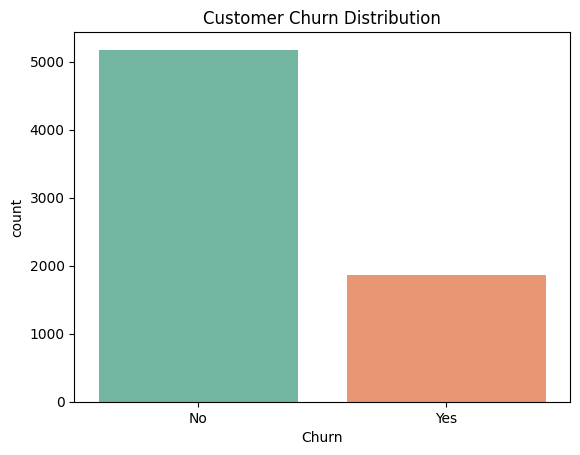

In [9]:
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.show()

**Contract Type vs Churn**

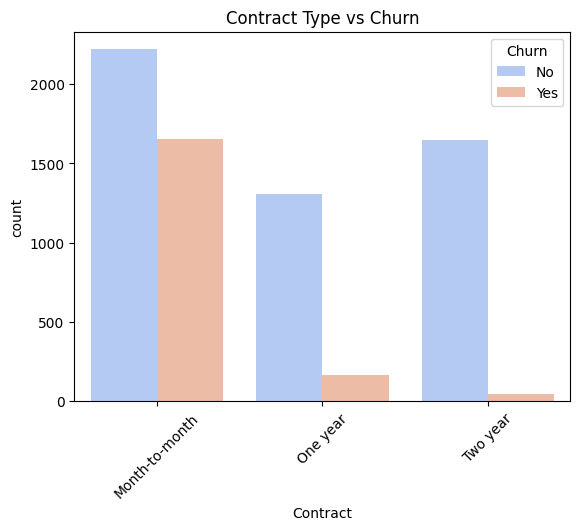

In [10]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Contract Type vs Churn')
plt.show()

**Monthly** **Charges**

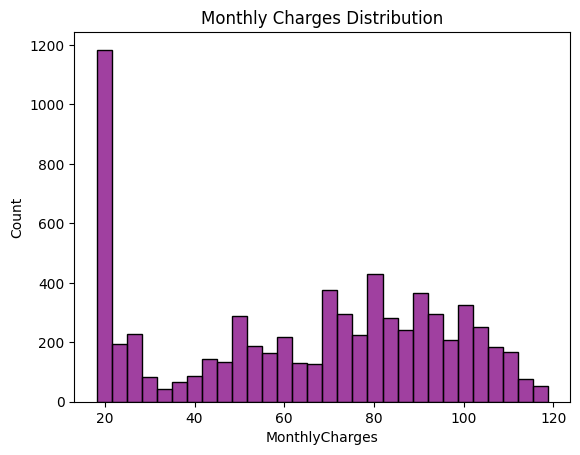

In [11]:
sns.histplot(df['MonthlyCharges'], bins=30, color='purple')
plt.title('Monthly Charges Distribution')
plt.show()

**Tenure** **vs** **Churn**

/tmp/ipython-input-705192536.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Pastel1')


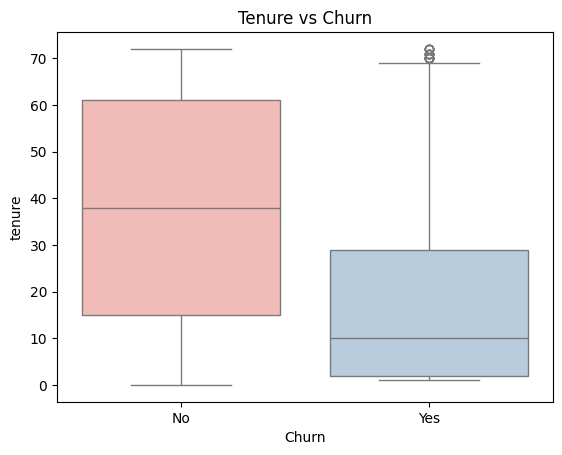

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df, palette='Pastel1')
plt.title('Tenure vs Churn')
plt.show()

**Internet Service vs Churn**

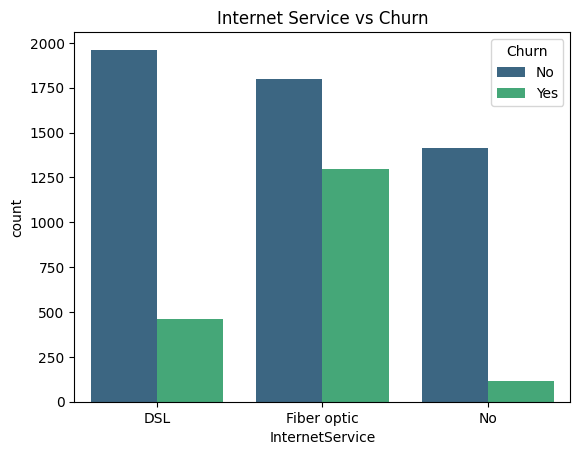

In [13]:
sns.countplot(x='InternetService', hue='Churn', data=df, palette='viridis')
plt.title('Internet Service vs Churn')
plt.show()

# **Correlation Heatmap**

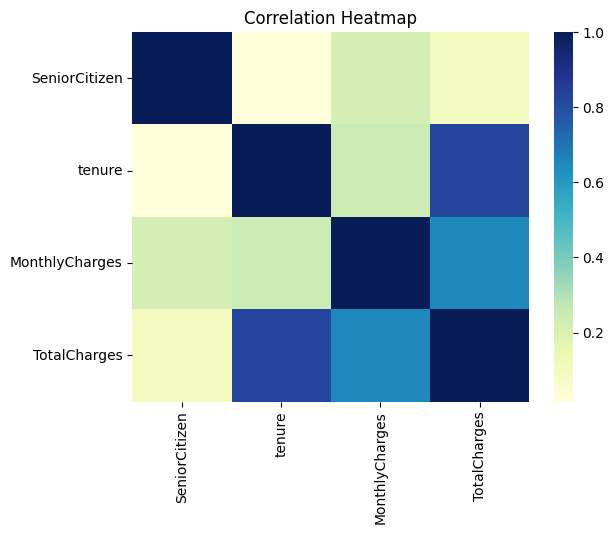

In [15]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), cmap='YlGnBu', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# **SIMPLE CHATBOT**

In [18]:
while True:
    q = input("Ask churn question (type 'bye' to exit): ").lower()

    if q == 'bye':
        print("Chatbot closed.")
        break

    elif "how many" in q and "churn" in q and "not" not in q:
        print("Customers Churned:", df['Churn'].value_counts().get('Yes', 0))

    elif "not churn" in q or "did not churn" in q or "retained" in q:
        print("Customers Retained:", df['Churn'].value_counts().get('No', 0))

    elif "churn rate" in q:
        rate = df['Churn'].value_counts(normalize=True) * 100
        print(rate)

    elif "contract" in q:
        print(df.groupby('Contract')['Churn'].value_counts())

    elif "monthly charges" in q:
        print("Average Monthly Charges:", round(df['MonthlyCharges'].mean(), 2))

    else:
        print("You can ask about churned customers, retained customers, churn rate, contract type, or charges.")

Ask churn question (type 'bye' to exit): How many customers churned
Customers Churned: 1869
Ask churn question (type 'bye' to exit): How many customers did not churn?
Customers Retained: 5174
Ask churn question (type 'bye' to exit): What is the churn rate?
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64
Ask churn question (type 'bye' to exit): Churn by contract?
Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64
Ask churn question (type 'bye' to exit): bye
Chatbot closed.
